In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [ ]:
!kaggle datasets download -d balamurugan1603/traffic-signs-train-val-split
#!kaggle datasets download -d flo2607/traffic-signs-classification

 78% 50.0M/64.4M [00:03<00:01, 11.1MB/s]
100% 64.4M/64.4M [00:03<00:00, 21.3MB/s]


In [ ]:
!unzip traffic-signs-train-val-split.zip

In [ ]:
import tensorflow as tf

from keras.models import Sequential

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense, AveragePooling3D
from tensorflow.keras.models import save_model
from keras.callbacks import EarlyStopping

In [ ]:
!ls

conv2d_model.zip  labels.csv	   sample_data
extract.py	  model_trained.p  traffic-signs-classification.zip
kaggle.json	  myData


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255
                             ).flow_from_directory("/content/traffic signs split/train",
                                                                      target_size=(32, 32),
                                                                      batch_size=32,
                                                                      class_mode="categorical")

val_datagen = ImageDataGenerator(rescale=1./255).flow_from_directory("/content/traffic signs split/val",
                                                                     target_size=(32, 32),
                                                                     batch_size=32,
                                                                     class_mode="categorical")

Found 58510 images belonging to 43 classes.
Found 14629 images belonging to 43 classes.


In [ ]:
model = models.Sequential();
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(43, activation="softmax"))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d_4 (Averag  (None, 15, 15, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 16)        4624      
                                                                 
 flatten_6 (Flatten)         (None, 2704)              0         
                                                                 
 dense_7 (Dense)             (None, 100)               270500    
                                                                 
 dense_8 (Dense)             (None, 43)                4343      
                                                     

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=100, patience=5)
history = model.fit_generator(train_datagen, validation_data=val_datagen, epochs=9, verbose=100, callbacks=[es])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/9
Epoch 2/9
Epoch 3/9
Epoch 4/9
Epoch 5/9
Epoch 6/9
Epoch 7/9
Epoch 8/9
Epoch 9/9


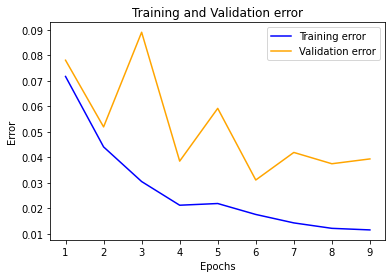

In [ ]:
history_dict = history.history
train_acc = history_dict['loss']
val_acc = history_dict['val_loss']
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, train_acc,'b', label='Training error')
plt.plot(epochs, val_acc,'b', color="orange", label='Validation error')
plt.title('Training and Validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
history.history

{'accuracy': [0.9806870818138123,
  0.9878140687942505,
  0.9911126494407654,
  0.9936250448226929,
  0.9940181374549866,
  0.9949410557746887,
  0.9955562949180603,
  0.9964108467102051,
  0.996496319770813],
 'loss': [0.07172726094722748,
  0.044093094766139984,
  0.03049568086862564,
  0.02120758593082428,
  0.021875154227018356,
  0.017584888264536858,
  0.014272334985435009,
  0.01214026939123869,
  0.011518659070134163],
 'val_accuracy': [0.9794927835464478,
  0.9859867095947266,
  0.97416090965271,
  0.9907717704772949,
  0.9851664304733276,
  0.9926857352256775,
  0.9907034039497375,
  0.9913186430931091,
  0.9901565313339233],
 'val_loss': [0.07810109108686447,
  0.051939498633146286,
  0.08907999843358994,
  0.03851000592112541,
  0.059217095375061035,
  0.031100451946258545,
  0.041916508227586746,
  0.03748204559087753,
  0.03937441483139992]}

In [ ]:
save_model(model, "2conv2d_model")

INFO:tensorflow:Assets written to: 2conv2d_model/assets
